In [1]:
from sympy import *
from math import pi
from sympy.matrices import Matrix
from sympy.physics.vector import *
#Defining robot parameter symbols
a3 = Symbol("a_3")
d1 = Symbol("d_1")
d3 = Symbol("d_3")
d5 = Symbol("d_5")
d7 = Symbol("d_7")
#Defining joint angle symbols
theta1 = Symbol("theta_1")
theta2 = Symbol("theta_2")
theta3 = Symbol("theta_3")
theta4 = Symbol("theta_4")
theta5 = Symbol("theta_5")
theta6 = Symbol("theta_6")
theta7 = Symbol("theta_7")

In [2]:
A1 = Matrix([[cos(theta1), 0, sin(theta1), 0],[sin(theta1), 0, -cos(theta1), 0],[0, 1, 0, d1],[0, 0, 0, 1]])

A2 = Matrix([[cos(theta2), 0, -sin(theta2), 0],[sin(theta2), 0, cos(theta2), 0],[0, -1, 0, 0],[0, 0, 0, 1]])

A3 = Matrix([[cos(theta3), 0, -sin(theta3), a3*cos(theta3)],[sin(theta3), 0, cos(theta3), a3*sin(theta3)],[0, -1, 0, d3],[0, 0, 0, 1]])

A4 = Matrix([[cos(theta4), 0, sin(theta4), -a3*cos(theta4)],[sin(theta4), 0, -cos(theta4), -a3*sin(theta4)],[0, 1, 0, 0],[0, 0, 0, 1]])

A5 = Matrix([[cos(theta5), 0, sin(theta5), 0],[sin(theta5), 0, -cos(theta5), 0],[0, 1, 0, d5],[0, 0, 0, 1]])

A6 = Matrix([[cos(theta6), 0, -sin(theta6), a3*cos(theta6)],[sin(theta6), 0, cos(theta6), a3*sin(theta6)],[0, -1, 0, 0],[0, 0, 0, 1]])

A7 = Matrix([[cos(theta7), -sin(theta7), 0, 0],[sin(theta7), cos(theta7), 0, 0],[0, 0, 1, -d7-100],[0, 0, 0, 1]])

In [3]:
#Substituting theta3=0 since joint 3 is locked
A3=A3.subs(theta3, 0)

#Calculating end effector orientation wrt base frame below Generalized Form
A10 = A1
A20 = A1 * A2
A30 = A1 * A2 * A3
A40 = A1 * A2 * A3 * A4
A50 = A1 * A2 * A3 * A4 * A5
A60 = A1 * A2 * A3 * A4 * A5 * A6
A70 = A1 * A2 * A3 * A4 * A5 * A6 * A7

In [4]:
import time
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
start = time.time() #start time


In [5]:
Xp0 = A70.col(3)
Xp0.row_del(3)
pprint(Xp0)

⎡a₃⋅((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin
⎢                                                                             
⎢a₃⋅((sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₅)⋅cos
⎢                                                                             
⎣                                                                           a₃

(θ₅))⋅cos(θ₆) + a₃⋅(-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅sin(θ₆
                                                                              
(θ₁))⋅cos(θ₆) + a₃⋅(-sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅sin(θ₆
                                                                              
⋅(sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + a₃⋅(sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅c

) - a₃⋅sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) - a₃⋅cos(θ₁)⋅cos(θ₂)⋅cos(θ₄) + a₃⋅cos(θ₁)⋅cos(θ
                                                                              
) - a₃⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) - a₃⋅sin(θ₁)⋅cos(θ₂

In [6]:
#Calculating Partial Differentials for the jacobian
dele1 = diff(Xp0, theta1)
dele2 = diff(Xp0, theta2)
dele4 = diff(Xp0, theta4)
dele5 = diff(Xp0, theta5)
dele6 = diff(Xp0, theta6)
dele7 = diff(Xp0, theta7)

In [7]:
#Printing the column vector for joint 1
pprint(dele1)

⎡a₃⋅((-sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) - sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₅)⋅co
⎢                                                                             
⎢a₃⋅((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin
⎢                                                                             
⎣                                                                             

s(θ₁))⋅cos(θ₆) + a₃⋅(sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) - sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅sin(θ₆
                                                                              
(θ₅))⋅cos(θ₆) + a₃⋅(-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅sin(θ₆
                                                                              
                                                                              

) + a₃⋅sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + a₃⋅sin(θ₁)⋅cos(θ₂)⋅cos(θ₄) - a₃⋅sin(θ₁)⋅cos(θ
                                                                              
) - a₃⋅sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) - a₃⋅cos(θ₁)⋅cos(θ₂

In [8]:
#Printing the column vector for joint 2
pprint(dele2)

⎡a₃⋅(-sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) - cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + a₃⋅(-sin(θ₂
⎢                                                                             
⎢a₃⋅(-sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) - sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + a₃⋅(-sin(θ₁
⎢                                                                             
⎣                                                        a₃⋅(sin(θ₂)⋅sin(θ₄) +

)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₅)⋅cos(θ₆) + a₃⋅sin(θ₂)⋅cos(
                                                                              
)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ₅)⋅cos(θ₆) + a₃⋅sin(θ₁)⋅sin(
                                                                              
 cos(θ₂)⋅cos(θ₄))⋅cos(θ₅)⋅cos(θ₆) + a₃⋅(-sin(θ₂)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₂))⋅si

θ₁)⋅cos(θ₄) - a₃⋅sin(θ₂)⋅cos(θ₁) - a₃⋅sin(θ₄)⋅cos(θ₁)⋅cos(θ₂) - d₃⋅cos(θ₁)⋅cos
                                                                              
θ₂)⋅cos(θ₄) - a₃⋅sin(θ₁)⋅sin(θ₂) - a₃⋅sin(θ₁)⋅sin(

In [9]:
#Printing the column vector for joint 4, Joint 3 locked and hence not considered
pprint(dele4)

⎡a₃⋅(sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + a₃⋅(sin(θ₂)⋅
⎢                                                                             
⎢a₃⋅(sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₆) + a₃⋅(sin(θ₁)⋅
⎢                                                                             
⎣                                              a₃⋅(-sin(θ₂)⋅sin(θ₄) - cos(θ₂)⋅

cos(θ₁)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₅)⋅cos(θ₆) - a₃⋅sin(θ₂)⋅cos(θ₁
                                                                              
sin(θ₂)⋅cos(θ₄) - sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ₅)⋅cos(θ₆) - a₃⋅sin(θ₁)⋅sin(θ₂
                                                                              
cos(θ₄))⋅cos(θ₅)⋅cos(θ₆) + a₃⋅(sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₆) + a₃

)⋅cos(θ₄) + a₃⋅sin(θ₄)⋅cos(θ₁)⋅cos(θ₂) + d₅⋅(sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)
                                                                              
)⋅cos(θ₄) + a₃⋅sin(θ₁)⋅sin(θ₄)⋅cos(θ₂) + d₅⋅(sin(θ

In [10]:
#Printing the column vector for joint 5
pprint(dele5)

⎡a₃⋅(-(sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) - sin(θ₁)⋅co
⎢                                                                             
⎢a₃⋅(-(sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) + cos(θ₁)⋅co
⎢                                                                             
⎣                                    -a₃⋅(sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅s

s(θ₅))⋅cos(θ₆) - (-d₇ - 100)⋅(-(sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(
                                                                              
s(θ₅))⋅cos(θ₆) - (-d₇ - 100)⋅(-(sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(
                                                                              
in(θ₅)⋅cos(θ₆) + (-d₇ - 100)⋅(sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₅)⋅sin(θ

θ₄))⋅sin(θ₅) - sin(θ₁)⋅cos(θ₅))⋅sin(θ₆)⎤
                                       ⎥
θ₄))⋅sin(θ₅) + cos(θ₁)⋅cos(θ₅))⋅sin(θ₆)⎥
                                       ⎥
₆)                                     ⎦


In [11]:
#Printing the column vector for joint 6
pprint(dele6)

⎡-a₃⋅((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅si
⎢                                                                             
⎢-a₃⋅((sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₅)⋅co
⎢                                                                             
⎣                                                     a₃⋅(sin(θ₂)⋅sin(θ₄) + co

n(θ₅))⋅sin(θ₆) + a₃⋅(-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ
                                                                              
s(θ₁))⋅sin(θ₆) + a₃⋅(-sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ
                                                                              
s(θ₂)⋅cos(θ₄))⋅cos(θ₆) - a₃⋅(sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₆)⋅cos(θ₅

₆) + (-d₇ - 100)⋅(-((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅
                                                                              
₆) + (-d₇ - 100)⋅(-((sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin

In [12]:
#Printing the column vector for joint 7
pprint(dele7)

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


In [13]:
#Calculating Z column vectors for Jacobian
Z1 = A10.col(2)
Z1.row_del(3)
Z2 = A20.col(2)
Z2.row_del(3)
Z4 = A40.col(2)
Z4.row_del(3)
Z5 = A50.col(2)
Z5.row_del(3)
Z6 = A60.col(2)
Z6.row_del(3)
Z7 = A70.col(2)
Z7.row_del(3)

In [14]:
#Note theta3 is locked and hence not considered in the Jacobian
#Printing the 0_Z_1 element of Jacobian
pprint(Z1)

⎡sin(θ₁) ⎤
⎢        ⎥
⎢-cos(θ₁)⎥
⎢        ⎥
⎣   0    ⎦


In [15]:
#Printing the 0_Z_2 element of Jacobian
pprint(Z2)

⎡-sin(θ₂)⋅cos(θ₁)⎤
⎢                ⎥
⎢-sin(θ₁)⋅sin(θ₂)⎥
⎢                ⎥
⎣    cos(θ₂)     ⎦


In [16]:
#Printing the 0_Z_4 element of Jacobian
pprint(Z4)

⎡-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂)⎤
⎢                                                  ⎥
⎢-sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂)⎥
⎢                                                  ⎥
⎣        sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄)         ⎦


In [17]:
#Printing the 0_Z_5 element of Jacobian
pprint(Z5)

⎡(sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) + sin(θ₁)⋅cos(θ₅)
⎢                                                                             
⎢(sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅sin(θ₅) - cos(θ₁)⋅cos(θ₅)
⎢                                                                             
⎣                 (sin(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₅)                 

⎤
⎥
⎥
⎥
⎦


In [18]:
#Printing the 0_Z_6 element of Jacobian
pprint(Z6)

⎡-((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin(θ
⎢                                                                             
⎢-((sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₅)⋅cos(θ
⎢                                                                             
⎣                           (sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄))⋅cos(θ₆) - (sin

₅))⋅sin(θ₆) + (-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₆)⎤
                                                                          ⎥
₁))⋅sin(θ₆) + (-sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ₆)⎥
                                                                          ⎥
(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₆)⋅cos(θ₅)                           ⎦


In [19]:
#Printing the 0_Z_7 element of Jacobian
pprint(Z7)

⎡-((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin(θ
⎢                                                                             
⎢-((sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) + sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) + sin(θ₅)⋅cos(θ
⎢                                                                             
⎣                           (sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄))⋅cos(θ₆) - (sin

₅))⋅sin(θ₆) + (-sin(θ₂)⋅cos(θ₁)⋅cos(θ₄) + sin(θ₄)⋅cos(θ₁)⋅cos(θ₂))⋅cos(θ₆)⎤
                                                                          ⎥
₁))⋅sin(θ₆) + (-sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) + sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅cos(θ₆)⎥
                                                                          ⎥
(θ₂)⋅cos(θ₄) - sin(θ₄)⋅cos(θ₂))⋅sin(θ₆)⋅cos(θ₅)                           ⎦


In [20]:
#Defining the Jacobian Matrix
Jacob = Matrix([[dele1,dele2,dele4,dele5,dele6,dele7],[Z1,Z2,Z4,Z5,Z6,Z7]])
J=Jacob.evalf()
pprint(J)


⎡a₃⋅((-sin(θ₁)⋅sin(θ₂)⋅sin(θ₄) - sin(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₅)⋅co
⎢                                                                             
⎢a₃⋅((sin(θ₂)⋅sin(θ₄)⋅cos(θ₁) + cos(θ₁)⋅cos(θ₂)⋅cos(θ₄))⋅cos(θ₅) - sin(θ₁)⋅sin
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

s(θ₁))⋅cos(θ₆) + a₃⋅(sin(θ₁)⋅sin(θ₂)⋅cos(θ₄) - sin(θ₁)⋅sin(θ₄)⋅cos(θ₂))⋅sin(θ₆
                                                   

In [21]:
#Writing Geometric dimensions of robot in Jacobian and End effector transformation wrt Base
J =J.subs({a3:0.088,d1:0.333,d3:0.316,d5:0.384,d7:0.107})
A07 =A70.subs({a3:0.088,d1:0.333,d3:0.316,d5:0.384,d7:0.107})

#Defining the initial value of joint angles given in question
q = Matrix([[0.0], [0.0], [pi/2], [0.0], [pi], [0.0]])

#Defining the list for storing the values of x, y, and z of end effectors
y = []
z = []
x = []
tau_1 = []
tau_2 = []
tau_4 = []
tau_5 = []
tau_6 = []
tau_7 = []
t = []

i=0 #Defining the iterators

In [22]:
#Printing the initial Jacobian Matrix
J2 = J
J2 = J2.subs({theta1:q[0,0],theta2:q[1,0],theta4:q[2,0],theta5:q[3,0],theta6:q[4,0],theta7:q[5,0]}).evalf()
pprint(J2)

⎡   0     -0.491999999999994   0.175999999999994             0           -0.08
⎢                                                                             
⎢100.579          0                    0            -0.0879999999999877       
⎢                                                                             
⎢   0          100.579              -100.491                 0                
⎢                                                                             
⎢   0             0                   1.0                    0                
⎢                                                                             
⎢ -1.0            0                    0                   -1.0               
⎢                                                                             
⎣   0            1.0          6.12323399573677e-17           0           6.123

79999999999939            0          ⎤
                                     ⎥
    0                     0          ⎥
             

In [23]:
#Define time step for loop
T = 200 #Time required to complete one revolution
N = 1000 #No. of Iterations
dt = T / N #Time Step
ydot = [] #vector for storing end effector velocity
zdot = []

In [24]:
m1 = 4.970684
m2 = 0.646926+3.228604  #mass of link 3 added
m4 = 3.587895
m5 = 1.225946
m6 = 1.666555
m7 = 0.735522+0.1+0.1 #mass of fingers added with end effector link
F = 5.0
##Define position of center of mass of each link in the local frame
cg1 = Matrix([[3.875e-03],[2.081e-03],[-0.175],[1]])
cg2 = Matrix([[0],[0],[0.158],[1]])
cg4 = Matrix([[-5.317e-02 ],[1.04419e-01 ],[2.7454e-02 ],[1]])
cg5 = Matrix([[-1.1953e-02 ],[4.1065e-02],[-3.8437e-02 ],[1]])
cg6 = Matrix([[6.0149e-02 ],[-1.4117e-02 ],[-1.0517e-02 ],[1]])
cg7 = Matrix([[1.0517e-02],[-4.252e-03 ],[6.1597e-02],[1]])

##Define position of center of mass of each link in the reference frame (frame 0)
CG1 = cg1
CG2 = A10*cg2
CG4 = A40*cg4
CG5 = A50*cg5
CG6 = A60*cg6
CG7 = A70*cg7

##define gravitational acceleration
G = 9.8 ##unit is m/s^2

##Total potential energy of the system
P = m1*CG1[2]*G + m2*CG2[2]*G + m4*CG4[2]*G + m5*CG5[2]*G + m6*CG6[2]*G + m7*CG7[2]*G
    
##define g matrix
goft = Matrix([[diff(P,theta1)],[diff(P,theta2)],[diff(P,theta4)],[diff(P,theta5)],[diff(P,theta6)],[diff(P,theta7)]]).evalf()
goft = goft.subs({a3:0.088,d1:0.333,d3:0.316,d5:0.384,d7:0.107})
goft1 =goft
pprint(goft)



⎡                                                                             
⎢                                                                             
⎢-0.0964210717652⋅(sin(θ₂)⋅sin(θ₄) + cos(θ₂)⋅cos(θ₄))⋅sin(θ₅)⋅sin(θ₇) + 0.0389
⎢                                                                             
⎢                     -0.0964210717652⋅(-sin(θ₂)⋅sin(θ₄) - cos(θ₂)⋅cos(θ₄))⋅si
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎣                                                                             

                                                                              
                                                   

In [25]:
while (i<=1000):  ## run this for loop for more than 1000 time to make sure that circle is being perfactly drawn
    ## divide the entire circle to be drawing in 1000 points
    y_dot = (2*pi*0.1*cos((2*pi/1000)*i))/(200)
    z_dot = -(2*pi*0.1*sin((2*pi/1000)*i))/(200)
    ydot.append(y_dot)
    zdot.append(z_dot)

    V = Matrix([0.0,y_dot, z_dot, 0.0, 0.0, 0.0]).evalf()
    
    ## find the transformation matrix from base to end effector in each iteration
    ## take theta3 = 0
    A = A07.subs({theta1:q[0,0],theta2:q[1,0],theta4:q[2,0],theta5:q[3,0],theta6:q[4,0],theta7:q[5,0]}).evalf()

    # position of ball point in 7th frame
    P7 = Matrix([0,0,0,1])
    
    ## position of ball point in the origin frame
    P07 = A*P7
    ## add the value of x,y and z in the list at each iteration
    ## This will be used for plotting the circle later
    y.append(P07[1,0])
    z.append(P07[2,0])
    x.append(P07[0,0])
    ## jacobian to find the jacobian matrix for each iteration
    ## take theta3 = 0
    J1 = J.subs({theta1:q[0,0],theta2:q[1,0],theta4:q[2,0],theta5:q[3,0],theta6:q[4,0],theta7:q[5,0]}).evalf()

    ##g vector
    g = goft1.subs({theta1:q[0,0],theta2:q[1,0],theta4:q[2,0],theta5:q[3,0],theta6:q[4,0],theta7:q[5,0]}).evalf()

    ##Force vector
    F = Matrix([[-5],[0],[0],[0],[0],[0]])

    ## add the current time in the time lists
    t.append(i)
       
    ## find the final tau
    tau = g - (transpose(J1))*F
    ## add the value of individual torque into the list
    tau_1.append(tau[0])
    tau_2.append(tau[1])
    tau_4.append(tau[2])
    tau_5.append(tau[3])
    tau_6.append(tau[4])
    tau_7.append(tau[5])
    J_inv = J1.inv('LU')
    # # find the difference in the position of end effector in each iteration
    # ## update the value of q 
    q = q + (J_inv*V*dt)
    i+=1



In [26]:
i

1001

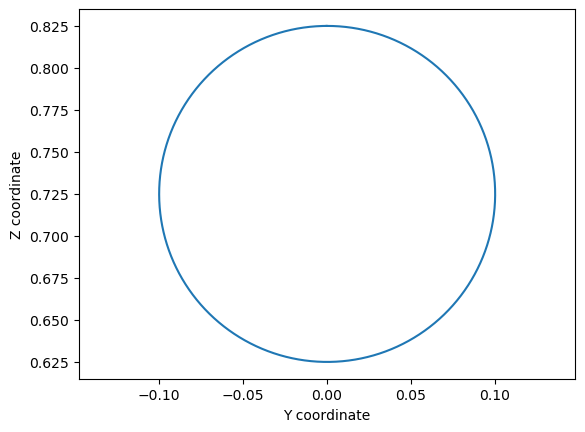

347.192973613739


In [27]:
# plot the circle after finding x and z value at each iteration
plt.plot(y,z)
plt.xlabel("Y coordinate")
plt.ylabel("Z coordinate")
plt.axis("equal")
plt.pause(0.05)
plt.show()
end = time.time()
print(end-start) # print time taken to run the code


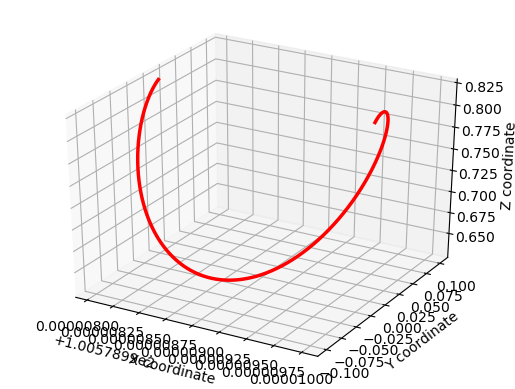

In [33]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# ax.axes.set_xlim3d(left=0.004, right=0.005) 
# # ax.axes.set_ylim3d(bottom=-1, top=1) 
# # ax.axes.set_zlim3d(bottom=0, top=1.000) 
ax.set_xlabel("X coordinate")
ax.set_ylabel("Y coordinate")
ax.set_zlabel("Z coordinate")


ax.plot3D(x, y, z, 'red' ,linewidth=2.5)


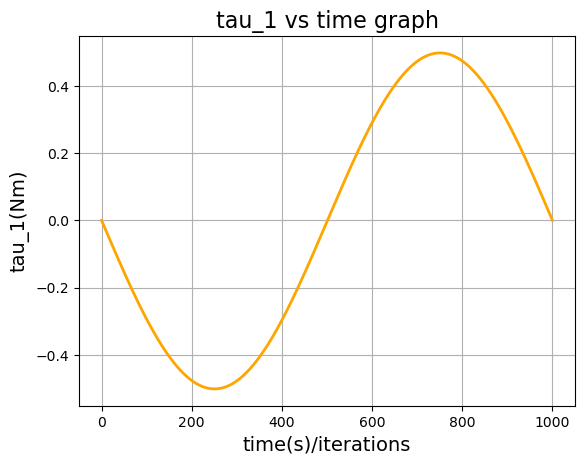

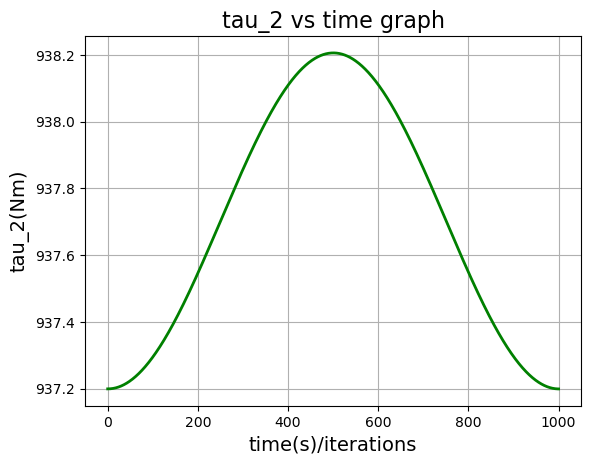

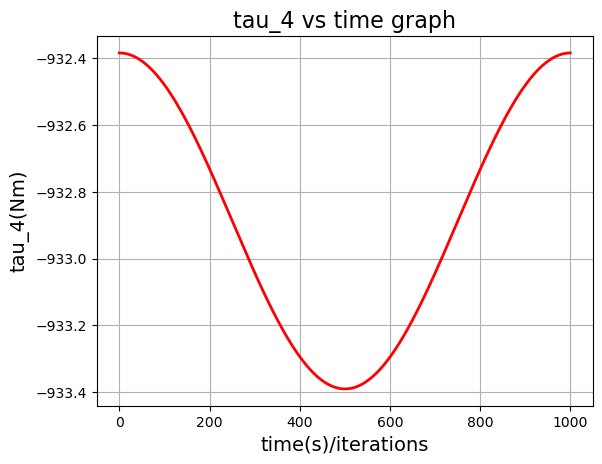

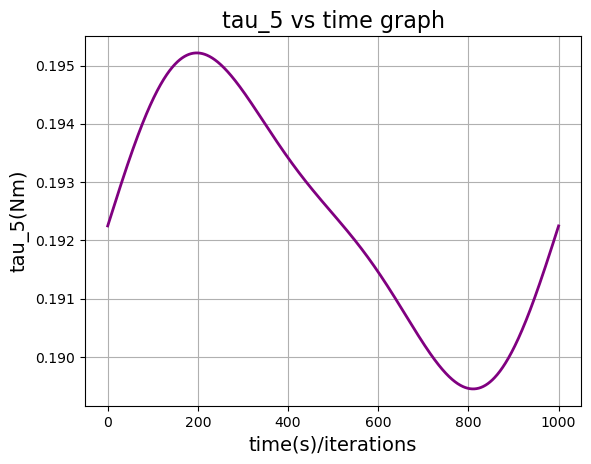

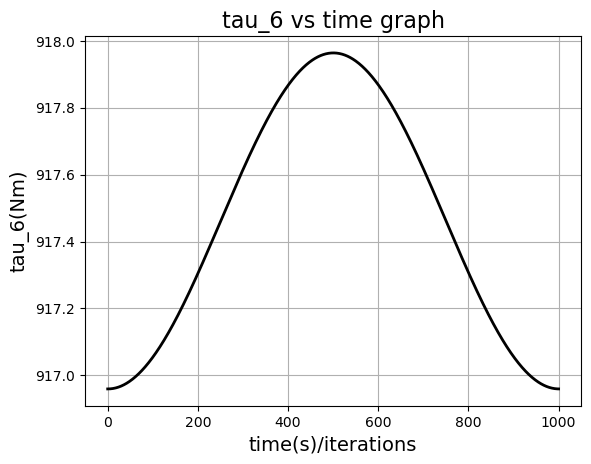

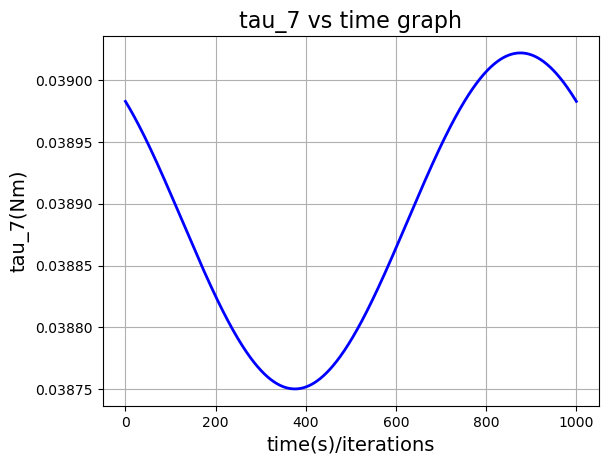

In [29]:
## plot the tau_1 vs time graph
# plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_1, lw = 2, color = 'orange' ) 
plt.title('tau_1 vs time graph',fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('tau_1(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_2 vs time graph
# plt.ylim(15,30)
plt.grid()
plt.plot(t,tau_2, lw = 2, color = 'green')
plt.title('tau_2 vs time graph', fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('tau_2(Nm)', fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_4 vs time graph
# plt.ylim(-30,-15)
plt.grid()
plt.plot(t,tau_4, lw = 2, color = 'red')
plt.title('tau_4 vs time graph', fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('tau_4(Nm)', fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_5 vs time graph
# plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_5, lw = 2, color = 'purple')
plt.title('tau_5 vs time graph',fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('tau_5(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_6 vs time graph
# plt.ylim(0,1.5)
plt.grid()
plt.plot(t,tau_6, lw = 2, color = 'black')
plt.title('tau_6 vs time graph',fontsize = 16)
plt.xlabel('time(s)/iterations',fontsize = 14)
plt.ylabel('tau_6(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_7 vs time graph
# plt.ylim(-5,5)
plt.grid()
plt.plot(t,tau_7, lw = 2, color = 'blue')
plt.title('tau_7 vs time graph',fontsize = 16)
plt.xlabel('time(s)/iterations',fontsize = 14)
plt.ylabel('tau_7(Nm)',fontsize = 14)
plt.pause(0.05)
plt.show()

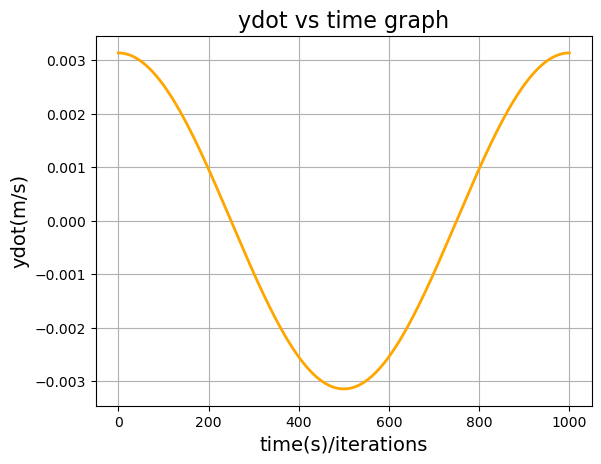

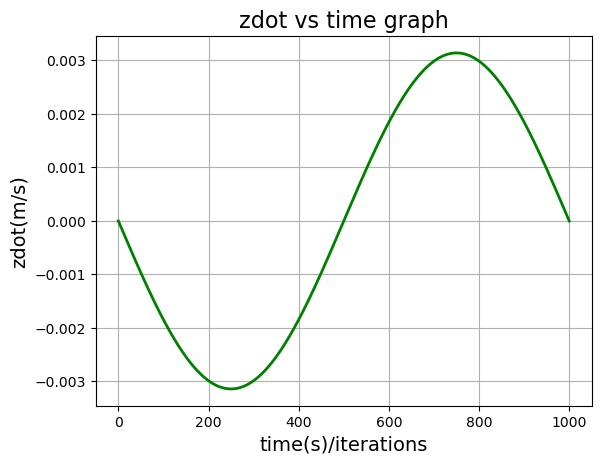

In [30]:
plt.grid()
plt.plot(t,ydot, lw = 2, color = 'orange' ) 
plt.title('ydot vs time graph',fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('ydot(m/s)',fontsize = 14)
plt.pause(0.05)
plt.show()

## plot the tau_2 vs time graph
# plt.ylim(15,30)
plt.grid()
plt.plot(t,zdot, lw = 2, color = 'green')
plt.title('zdot vs time graph', fontsize = 16)
plt.xlabel('time(s)/iterations', fontsize = 14)
plt.ylabel('zdot(m/s)', fontsize = 14)
plt.pause(0.05)
plt.show()
